In [1]:
# executes in ~23 seconds
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import bespoke module p04.py

In [2]:
# first test: executed in 46 seconds
# executes much faster if you first import pd and np
# executes in ~11 seconds
from p04 import vectorize_tfidf
from p04 import reduce_dim_lsa
from p04 import display_topics

In [3]:
import pickle

In [4]:
with open('grouped_sorted.pickle', 'rb') as readfile:
    subjects = pickle.load(readfile)

In [5]:
subjects

,text,le
label,,
Linear Algebra,152,152
Probability,124,124
CS,104,104
Diff. Eq.,93,93
Algorithms,81,81
Statistics,79,79
Calculus,70,70
Data Structures,62,62
AI,48,48


In [6]:
with open('df.pickle', 'rb') as readfile:
    df = pickle.load(readfile)

In [7]:
df

,text,label,le
0,follow content provide creative common license...,Calculus,3
1,sequence segment review mathematical backgroun...,Probability,9
2,follow content provide creative common license...,CS,2
3,follow content provide creative common license...,Algorithms,1
4,follow content provide creative common license...,Algorithms,1
...,...,...,...
855,follow content provide creative common license...,Math for Eng.,7
856,music david j malan end week see cir...,Diff. Eq.,5
857,follow content provide opencourseware creati...,Linear Algebra,6
858,follow content provide creative common license...,AI,0


In [8]:
df_linalg = df[df['label']=='Linear Algebra']
df_prob = df[df['label']=='Probability']
df_cs = df[df['label']=='CS']
df_diffeq = df[df['label']=='Diff. Eq.']
df_algo = df[df['label']=='Algorithms']
df_stats = df[df['label']=='Statistics']
df_calc = df[df['label']=='Calculus']
df_datastruc = df[df['label']=='Data Structures']
df_ai = df[df['label']=='AI']
df_engmath = df[df['label']=='Math for Eng.']
df_nlp = df[df['label']=='NLP']

# Heatmaps Iteration 01

Try fewer topics to see if that creates better separation.  
Also play with cmap.  
Also set color bar to the same values for all heatmaps.

In [9]:
df_s = df.copy()
sm_v, feature_names = vectorize_tfidf(df_s)

In [10]:
rd_v, lsa_components = reduce_dim_lsa(sm_v, 60)

In [11]:
display_topics(lsa_components, feature_names, 10)


Topic  0
vector, matrix, column, row, probability, equation, solution, transpose, transform, plane

Topic  1
probability, event, random, conditional, node, distribution, outcome, log, sample, tree

Topic  2
node, tree, list, log, edge, search, insert, algorithm, subtree, link

Topic  3
laplace_transform, equation, integral, derivative, solution, differential, pre, delta, sine, theta

Topic  4
vector, dot, plane, length, transform, scalar, direction, span, member, component

Topic  5
laplace_transform, node, st, probability, event, infinity, integral, vector, sine, row

Topic  6
solution, equation, differential, event, probability, derivative, slope, node, initial, pre

Topic  7
node, lambda, tree, subtree, integral, link, address, child, pdf, variance

Topic  8
edge, vertex, path, graph, weight, cycle, short, algorithm, delta, tree

Topic  9
row, integral, determinant, theta, dx, area, curve, field, plane, delta

Topic  10
eigenvalue, eigenvector, matrix, lambda, event, integral, delt

In [12]:
vmax = pd.DataFrame(rd_v).max().max()

In [13]:
vmin = pd.DataFrame(rd_v).min().min()

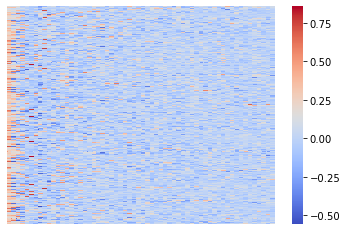

In [14]:
heat_map_01 = sns.heatmap(rd_v, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [15]:
list(subjects.index)

['Linear Algebra',
 'Probability',
 'CS',
 'Diff. Eq.',
 'Algorithms',
 'Statistics',
 'Calculus',
 'Data Structures',
 'AI',
 'Math for Eng.',
 'NLP']

In [16]:
df[df['label']=='Linear Algebra']

,text,label,le
8,ben harris hi ben today lu decomposition p...,Linear Algebra,6
9,s function f mapping set x y draw set x se...,Linear Algebra,6
26,follow content provide creative common license...,Linear Algebra,6
28,follow content provide creative common license...,Linear Algebra,6
32,segment discuss little bit union bind discus...,Linear Algebra,6
...,...,...,...
806,lecture symmetric matrix portant class m...,Linear Algebra,6
842,would like talk thank thing would like little ...,Linear Algebra,6
852,way nonlinear autonomous system los practice n...,Linear Algebra,6
854,follow content provide creative common license...,Linear Algebra,6


In [17]:
print(list(subjects.index))

['Linear Algebra', 'Probability', 'CS', 'Diff. Eq.', 'Algorithms', 'Statistics', 'Calculus', 'Data Structures', 'AI', 'Math for Eng.', 'NLP']


In [18]:
linalg_rd = pd.DataFrame(rd_v).iloc[df_linalg.index]
prob_rd = pd.DataFrame(rd_v).iloc[df_prob.index]
cs_rd = pd.DataFrame(rd_v).iloc[df_cs.index]
diffeq_rd = pd.DataFrame(rd_v).iloc[df_diffeq.index]
algo_rd = pd.DataFrame(rd_v).iloc[df_algo.index]
stats_rd = pd.DataFrame(rd_v).iloc[df_stats.index]
calc_rd = pd.DataFrame(rd_v).iloc[df_calc.index]
datastruc_rd = pd.DataFrame(rd_v).iloc[df_datastruc.index]
ai_rd = pd.DataFrame(rd_v).iloc[df_ai.index]
engmath_rd = pd.DataFrame(rd_v).iloc[df_engmath.index]
nlp_rd = pd.DataFrame(rd_v).iloc[df_nlp.index]


In [19]:
rd_list = [linalg_rd, prob_rd, cs_rd, diffeq_rd, algo_rd, stats_rd, calc_rd, datastruc_rd, ai_rd, engmath_rd, nlp_rd]
rd_names = ["linalg_rd", "prob_rd", "cs_rd", "diffeq_rd", "algo_rd", "stats_rd", "calc_rd", "datastruc_rd", "ai_rd", "engmath_rd", "nlp_rd"]
rd_dict = {key:val for (key, val) in zip(rd_names, rd_list)}

I have created slices of the original dataframe based on their subject labels.  
Now I need to get their indices, and create a heatmap from each list of indices.

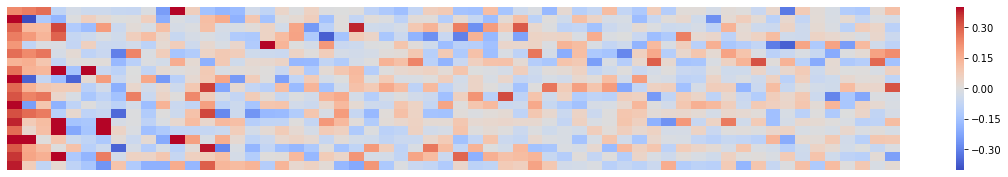

In [38]:
plt.figure(figsize=[20,3])
heat_map_linalg = sns.heatmap(linalg_rd.sample(19), vmin=-0.4, vmax=0.4, 
                              cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show();

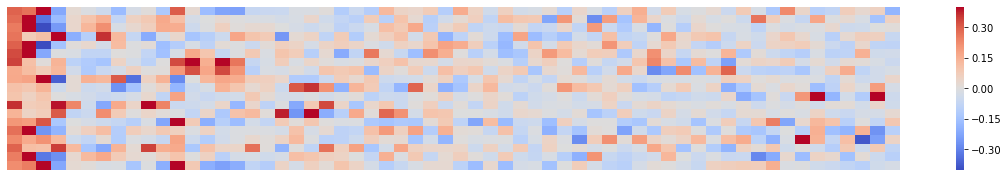

In [21]:
plt.figure(figsize=[20,3])
heat_map_nlp = sns.heatmap(nlp_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

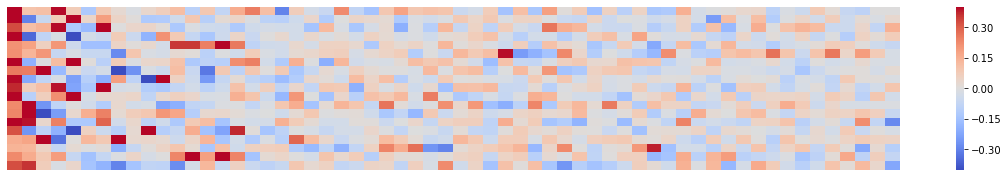

In [22]:
plt.figure(figsize=[20,3])
heat_map_prob = sns.heatmap(prob_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

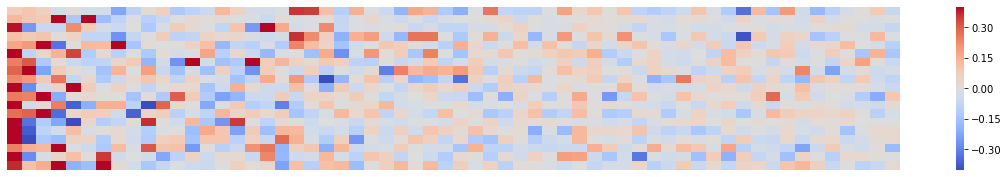

In [23]:
plt.figure(figsize=[20,3])
heat_map_cs = sns.heatmap(cs_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

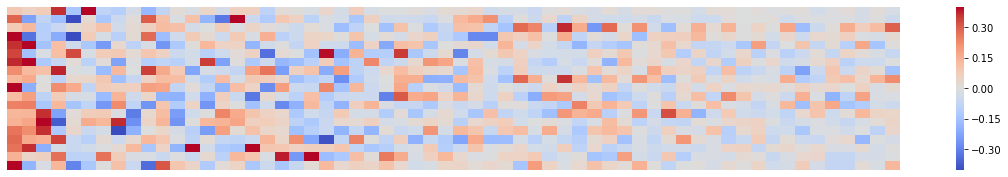

In [24]:
plt.figure(figsize=[20,3])
heat_map_diffeq = sns.heatmap(diffeq_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

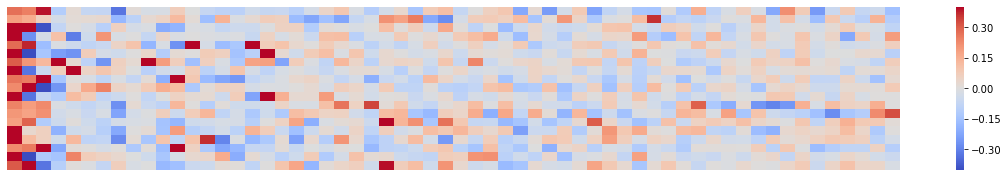

In [25]:
plt.figure(figsize=[20,3])
heat_map_algo = sns.heatmap(algo_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

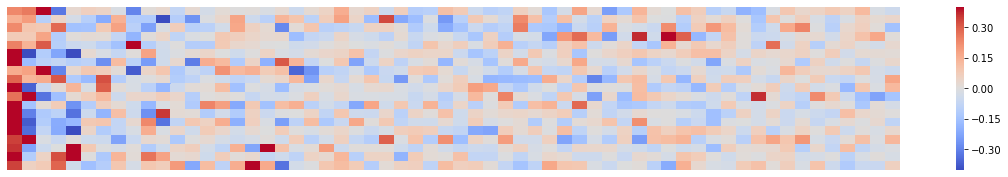

In [26]:
plt.figure(figsize=[20,3])
heat_map_stats = sns.heatmap(stats_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

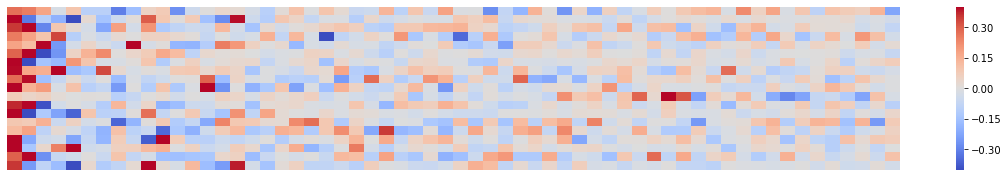

In [27]:
plt.figure(figsize=[20,3])
heat_map_calc = sns.heatmap(calc_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

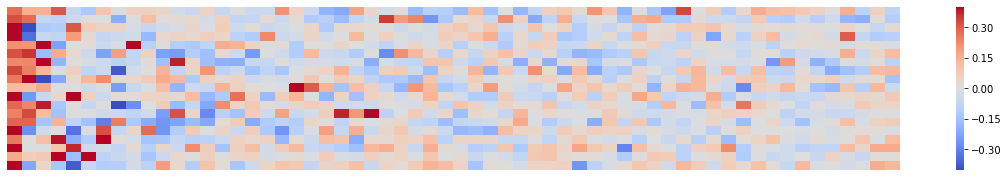

In [28]:
plt.figure(figsize=[20,3])
heat_map_datastruc = sns.heatmap(datastruc_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

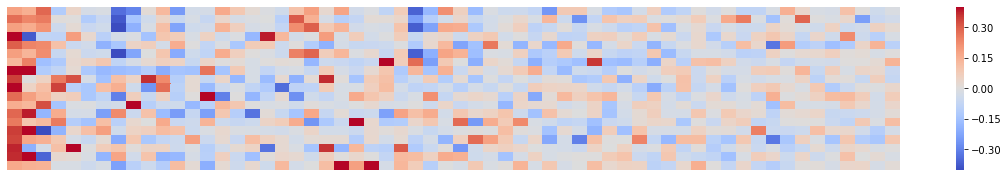

In [29]:
plt.figure(figsize=[20,3])
heat_map_ai = sns.heatmap(ai_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

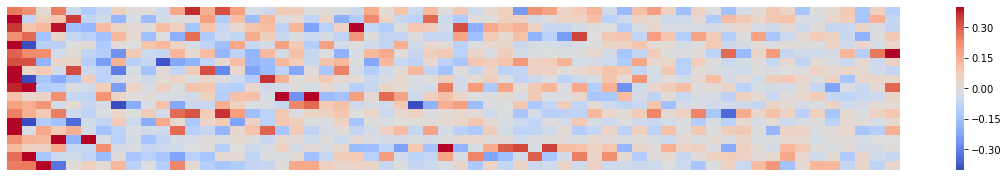

In [30]:
plt.figure(figsize=[20,3])
heat_map_engmath = sns.heatmap(engmath_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

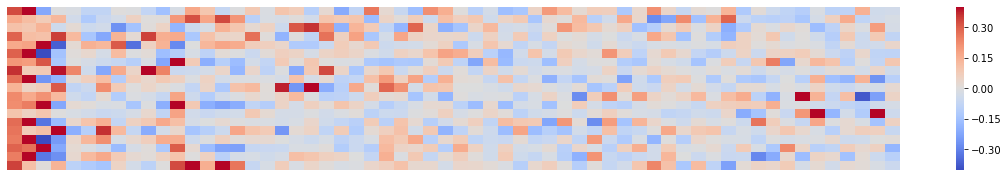

In [31]:
plt.figure(figsize=[20,3])
heat_map_nlp = sns.heatmap(nlp_rd.sample(19), vmin=-0.4, vmax=0.4, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [32]:
nlp_rd.shape

(19, 60)

## Calculate entropy

In [33]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
# If qk is not None, then compute the Kullback-Leibler divergence S = sum(pk * log(pk / qk), axis=0).
from scipy.stats import entropy
entropy(linalg_rd)

array([4.92943805,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf])

In [34]:
entropy(prob_rd)[0]

4.73198121101991

In [35]:
entropy_list = [entropy(x)[0].round(2) for x in rd_list]
# entropy_dict = {key:val for (key, val) in zip(rd_names, entropy(rd_list)[0])}
entropy_list

[4.93, 4.73, 4.55, 4.43, 4.28, 4.28, 4.15, 4.0, 3.78, 3.22, 2.89]

In [36]:
for subj, ent in zip(list(subjects.index), entropy_list):
    print(f"Kullback-Leibler divergence of {subj}:", ent)

Kullback-Leibler divergence of Linear Algebra: 4.93
Kullback-Leibler divergence of Probability: 4.73
Kullback-Leibler divergence of CS: 4.55
Kullback-Leibler divergence of Diff. Eq.: 4.43
Kullback-Leibler divergence of Algorithms: 4.28
Kullback-Leibler divergence of Statistics: 4.28
Kullback-Leibler divergence of Calculus: 4.15
Kullback-Leibler divergence of Data Structures: 4.0
Kullback-Leibler divergence of AI: 3.78
Kullback-Leibler divergence of Math for Eng.: 3.22
Kullback-Leibler divergence of NLP: 2.89


Divergence range for 60 topics: 2.89-4.93  
Divergence range for 50 topics: 2.91-4.93  
Divergence range for 40 topics: 2.91-4.94  
Divergence range for 30 topics: 2.91-4.95  
Divergence range for 20 topics: 2.91-4.96  
Divergence range for 10 topics: 2.90-4.96  
Divergence range for 5 topics: 2.90-4.98

group by subject  
compute mean component score for each topic  
heat map: 11 rows vs (# topic columns)  
look for dark squares